In [2]:
import os.path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.ticker as mticker
from matplotlib.dates import HourLocator, DateFormatter,DayLocator,MonthLocator


from datetime import datetime

from pandas import read_csv

import pmdarima as pm
from pmdarima.model_selection import train_test_split



In [138]:
def main():
    return
if __name__ == "__main__":
    main()

In [3]:
def make_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [3]:
def getfile(end):
    current_file = os.path.abspath(os.path.dirname(__file__)) #older/folder2/scripts_folder
    filename = os.path.join(current_file, end)
    return filename

In [4]:
data = read_csv("2021-all-meter.csv", index_col= 0)

In [142]:
display(data)

,AMI Meter ID,date,16335457,18762999,230156289,56068032,56073008,56210792,56464971,66675284,...,98828750,98923621,98923641,98923648,98923655,98923661,98923662,98923663,Residential,Total
0,2021-03-21 00:00:00,2021-03-21 00:30:00,104.192,28.649,46.68,13.104,9.195,373.44,19.656,5.491,...,20.640,0.324,15.228,16.212,47.430,51.60,16.35,21.624,67808.216,71482.267
1,2021-03-21 00:30:00,2021-03-21 01:00:00,104.848,28.578,51.60,15.728,9.810,373.44,20.640,6.278,...,21.624,0.324,14.736,15.228,39.198,46.68,16.35,17.688,67808.216,71395.502
2,2021-03-21 01:00:00,2021-03-21 01:30:00,106.160,29.929,55.29,14.416,8.580,375.96,19.656,7.853,...,9.338,0.160,15.228,14.244,40.976,44.22,14.30,18.180,68586.253,72266.724
3,2021-03-21 01:30:00,2021-03-21 02:00:00,104.192,29.488,50.37,16.384,11.040,378.36,18.672,6.278,...,9.418,0.324,14.736,14.244,42.165,44.22,16.35,16.704,68586.253,72069.140
4,2021-03-21 02:00:00,2021-03-21 02:30:00,104.192,28.645,52.83,15.728,12.270,375.96,20.640,4.704,...,8.928,0.324,15.228,16.212,50.782,46.68,18.40,18.180,71152.560,74632.641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,2021-09-27 21:30:00,2021-09-27 22:00:00,104.192,22.003,11.04,14.416,13.422,766.68,24.084,3.917,...,21.624,0.488,42.264,26.040,28.374,88.44,18.40,22.116,72763.262,76780.806
1772,2021-09-27 22:00:00,2021-09-27 22:30:00,104.192,22.214,9.81,11.136,12.476,727.44,22.608,3.917,...,21.132,0.324,40.296,22.608,29.898,88.44,16.35,20.148,61979.926,65924.937
1773,2021-09-27 22:30:00,2021-09-27 23:00:00,104.192,22.598,11.04,10.480,10.888,604.56,23.592,3.130,...,16.704,0.324,38.820,21.132,27.843,85.98,16.35,20.148,61979.926,65741.525
1774,2021-09-27 23:00:00,2021-09-27 23:30:00,104.192,22.598,9.81,7.856,9.106,668.40,20.148,3.130,...,15.720,0.488,35.880,15.720,24.676,85.98,14.30,19.656,51223.651,54984.815


In [5]:
data['AMI Meter ID'] =  pd.to_datetime(data['AMI Meter ID'], format='%Y-%m-%d %H:%M:%S')
data['date'] =  pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')

In [144]:
data["date"].max()

Timestamp('2021-09-28 00:00:00')

In [145]:
data.query("date < '2021-4-21'")

,AMI Meter ID,date,16335457,18762999,230156289,56068032,56073008,56210792,56464971,66675284,...,98828750,98923621,98923641,98923648,98923655,98923661,98923662,98923663,Residential,Total
0,2021-03-21 00:00:00,2021-03-21 00:30:00,104.192,28.649,46.68,13.104,9.195,373.44,19.656,5.491,...,20.640,0.324,15.228,16.212,47.430,51.60,16.35,21.624,67808.216,71482.267
1,2021-03-21 00:30:00,2021-03-21 01:00:00,104.848,28.578,51.60,15.728,9.810,373.44,20.640,6.278,...,21.624,0.324,14.736,15.228,39.198,46.68,16.35,17.688,67808.216,71395.502
2,2021-03-21 01:00:00,2021-03-21 01:30:00,106.160,29.929,55.29,14.416,8.580,375.96,19.656,7.853,...,9.338,0.160,15.228,14.244,40.976,44.22,14.30,18.180,68586.253,72266.724
3,2021-03-21 01:30:00,2021-03-21 02:00:00,104.192,29.488,50.37,16.384,11.040,378.36,18.672,6.278,...,9.418,0.324,14.736,14.244,42.165,44.22,16.35,16.704,68586.253,72069.140
4,2021-03-21 02:00:00,2021-03-21 02:30:00,104.192,28.645,52.83,15.728,12.270,375.96,20.640,4.704,...,8.928,0.324,15.228,16.212,50.782,46.68,18.40,18.180,71152.560,74632.641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,2021-04-20 21:00:00,2021-04-20 21:30:00,102.224,27.322,17.19,11.792,11.040,447.24,17.688,2.342,...,19.656,0.324,32.928,24.576,21.616,46.68,14.30,22.116,65294.972,69366.504
1483,2021-04-20 21:30:00,2021-04-20 22:00:00,101.568,26.726,19.65,9.824,9.810,530.76,17.688,2.342,...,21.624,0.160,32.928,20.148,21.616,49.14,16.35,21.624,65294.972,69386.190
1484,2021-04-20 22:00:00,2021-04-20 22:30:00,102.224,28.109,15.96,8.184,8.580,604.56,17.196,2.342,...,19.164,0.324,32.436,19.656,22.928,51.60,18.40,20.394,57004.433,61120.809
1485,2021-04-20 22:30:00,2021-04-20 23:00:00,102.224,28.301,19.65,6.544,11.040,604.56,17.688,3.130,...,19.164,0.324,28.992,15.720,20.960,49.14,14.30,19.164,57004.433,61111.753


In [146]:

def makeDailyCharts(x):
    xcopy = x.copy()
    for c in xcopy.select_dtypes(include=np.number).columns:
        stro = 1

        for s in xcopy["date"].dt.date.unique():
            strs = s.strftime("%Y%m%d")
            if stro == 1:
                stro = strs
                t = s
                continue
            daily = xcopy.query("date <= " + strs + " & date >" + stro)
            title = str(c) + " " + stro

            plt.clf()
            plot = sns.lineplot(daily,x="date", y=c)

            #plot.xaxis.set_major_locator(mticker.MaxNLocator(9))
            #ticks_loc = plot.get_xticks().tolist()
            #plot.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
            #plot.set_xticklabels([label_format(h=c) for c in range(0,24,24/ticks_loc.count())])

            plot.xaxis.set_major_locator(HourLocator(interval=2))
            plot.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))

            plt.title(title)
            plt.xlabel("Hour")
            plt.ylabel("Power(kwph)")
            plt.xticks(rotation='vertical')
            #plt.locator_params(axis='x', nbins=10)
            plt.tight_layout()
            sns.set_theme(style="whitegrid")



            make_dir(".\Daily Usage\\Customer " +str(c))

            plt.savefig(".\Daily Usage\\Customer " +str(c)+"\\"+ title + ".png")
            t = s
            stro = strs      
    return

In [192]:
def makeMonthlyCharts(x):
    xCopy = x.copy()
    yCopy = x.copy()
    xCopy["date"]= [v.replace(day=1) for v in x["date"].dt.date]
    
    for c in xCopy.select_dtypes(include=np.number).columns:
        
        t= 1
        for s in xCopy["date"].unique()[::-1]:
            Monthly = 0
            if t == 1:
                Monthly = yCopy.query("date > @s")
            else: 
                Monthly = yCopy.query("date > @s & date < @t")
                
            
            title = "Meter Number " + str(c) + " {m}-{y}".format(m=s.strftime("%B"),y=str(s.year))

            plt.clf()
            plot = sns.lineplot(Monthly,x="date", y=c)

            plot.xaxis.set_major_locator(DayLocator(interval=2))
            plot.xaxis.set_major_formatter(DateFormatter('%m-%d-%Y'))

            plt.title(title)
            plt.xlabel("Day")
            plt.ylabel("Power(kw)")
            plt.xticks(rotation='vertical')
            plt.tight_layout()
            sns.set_theme(style="whitegrid")

            make_dir(".\Monthly Usage\\Meter Number " +str(c))
            plt.savefig(".\Monthly Usage\\Meter Number " +str(c)+"\\"+ title + ".png")
            t = s   
    return

In [183]:
display(data)

,AMI Meter ID,date,16335457,18762999,230156289,56068032,56073008,56210792,56464971,66675284,...,98828750,98923621,98923641,98923648,98923655,98923661,98923662,98923663,Residential,Total
0,2021-03-21 00:00:00,2021-03-21 00:30:00,104.192,28.649,46.68,13.104,9.195,373.44,19.656,5.491,...,20.640,0.324,15.228,16.212,47.430,51.60,16.35,21.624,67808.216,71482.267
1,2021-03-21 00:30:00,2021-03-21 01:00:00,104.848,28.578,51.60,15.728,9.810,373.44,20.640,6.278,...,21.624,0.324,14.736,15.228,39.198,46.68,16.35,17.688,67808.216,71395.502
2,2021-03-21 01:00:00,2021-03-21 01:30:00,106.160,29.929,55.29,14.416,8.580,375.96,19.656,7.853,...,9.338,0.160,15.228,14.244,40.976,44.22,14.30,18.180,68586.253,72266.724
3,2021-03-21 01:30:00,2021-03-21 02:00:00,104.192,29.488,50.37,16.384,11.040,378.36,18.672,6.278,...,9.418,0.324,14.736,14.244,42.165,44.22,16.35,16.704,68586.253,72069.140
4,2021-03-21 02:00:00,2021-03-21 02:30:00,104.192,28.645,52.83,15.728,12.270,375.96,20.640,4.704,...,8.928,0.324,15.228,16.212,50.782,46.68,18.40,18.180,71152.560,74632.641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,2021-09-27 21:30:00,2021-09-27 22:00:00,104.192,22.003,11.04,14.416,13.422,766.68,24.084,3.917,...,21.624,0.488,42.264,26.040,28.374,88.44,18.40,22.116,72763.262,76780.806
1772,2021-09-27 22:00:00,2021-09-27 22:30:00,104.192,22.214,9.81,11.136,12.476,727.44,22.608,3.917,...,21.132,0.324,40.296,22.608,29.898,88.44,16.35,20.148,61979.926,65924.937
1773,2021-09-27 22:30:00,2021-09-27 23:00:00,104.192,22.598,11.04,10.480,10.888,604.56,23.592,3.130,...,16.704,0.324,38.820,21.132,27.843,85.98,16.35,20.148,61979.926,65741.525
1774,2021-09-27 23:00:00,2021-09-27 23:30:00,104.192,22.598,9.81,7.856,9.106,668.40,20.148,3.130,...,15.720,0.488,35.880,15.720,24.676,85.98,14.30,19.656,51223.651,54984.815


[datetime.date(2021, 9, 1) datetime.date(2021, 8, 1)
 datetime.date(2021, 7, 1) datetime.date(2021, 6, 1)
 datetime.date(2021, 5, 1) datetime.date(2021, 4, 1)
 datetime.date(2021, 3, 1)]
[datetime.date(2021, 9, 1) datetime.date(2021, 8, 1)
 datetime.date(2021, 7, 1) datetime.date(2021, 6, 1)
 datetime.date(2021, 5, 1) datetime.date(2021, 4, 1)
 datetime.date(2021, 3, 1)]
[datetime.date(2021, 9, 1) datetime.date(2021, 8, 1)
 datetime.date(2021, 7, 1) datetime.date(2021, 6, 1)
 datetime.date(2021, 5, 1) datetime.date(2021, 4, 1)
 datetime.date(2021, 3, 1)]
[datetime.date(2021, 9, 1) datetime.date(2021, 8, 1)
 datetime.date(2021, 7, 1) datetime.date(2021, 6, 1)
 datetime.date(2021, 5, 1) datetime.date(2021, 4, 1)
 datetime.date(2021, 3, 1)]
[datetime.date(2021, 9, 1) datetime.date(2021, 8, 1)
 datetime.date(2021, 7, 1) datetime.date(2021, 6, 1)
 datetime.date(2021, 5, 1) datetime.date(2021, 4, 1)
 datetime.date(2021, 3, 1)]
[datetime.date(2021, 9, 1) datetime.date(2021, 8, 1)
 datetime.da

[datetime.date(2021, 9, 1) datetime.date(2021, 8, 1)
 datetime.date(2021, 7, 1) datetime.date(2021, 6, 1)
 datetime.date(2021, 5, 1) datetime.date(2021, 4, 1)
 datetime.date(2021, 3, 1)]
[datetime.date(2021, 9, 1) datetime.date(2021, 8, 1)
 datetime.date(2021, 7, 1) datetime.date(2021, 6, 1)
 datetime.date(2021, 5, 1) datetime.date(2021, 4, 1)
 datetime.date(2021, 3, 1)]
[datetime.date(2021, 9, 1) datetime.date(2021, 8, 1)
 datetime.date(2021, 7, 1) datetime.date(2021, 6, 1)
 datetime.date(2021, 5, 1) datetime.date(2021, 4, 1)
 datetime.date(2021, 3, 1)]
[datetime.date(2021, 9, 1) datetime.date(2021, 8, 1)
 datetime.date(2021, 7, 1) datetime.date(2021, 6, 1)
 datetime.date(2021, 5, 1) datetime.date(2021, 4, 1)
 datetime.date(2021, 3, 1)]
[datetime.date(2021, 9, 1) datetime.date(2021, 8, 1)
 datetime.date(2021, 7, 1) datetime.date(2021, 6, 1)
 datetime.date(2021, 5, 1) datetime.date(2021, 4, 1)
 datetime.date(2021, 3, 1)]
[datetime.date(2021, 9, 1) datetime.date(2021, 8, 1)
 datetime.da

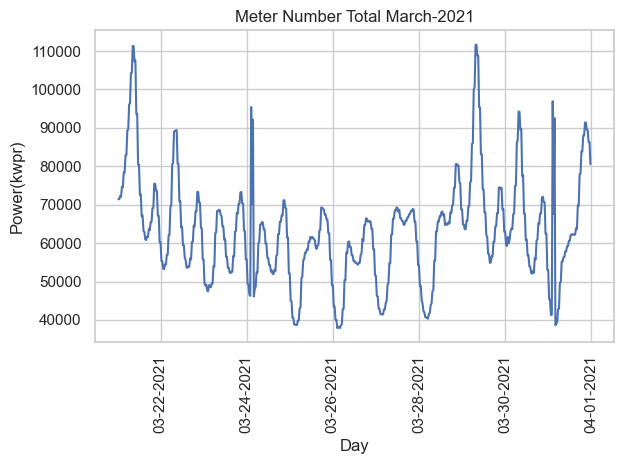

In [190]:
makeMonthlyCharts(data)

In [ ]:
data["date"].dt.date.unique()

In [196]:
def makeAnnualCharts(x):
    xCopy = x.copy()
    
    for c in xCopy.select_dtypes(include=np.number).columns:
            
            title = "Meter Number " + str(c) + " {y}".format(y=str(s.year))

            plt.clf()
            plot = sns.lineplot(xCopy,x="date", y=c)

            plot.xaxis.set_major_locator(MonthLocator(interval=1))
            plot.xaxis.set_major_formatter(DateFormatter('%m-%d-%Y'))

            plt.title(title)
            plt.xlabel("Month")
            plt.ylabel("Power(kw)")
            plt.xticks(rotation='vertical')
            plt.tight_layout()
            sns.set_theme(style="whitegrid")

            make_dir(".\Annual Usage\\Meter Number " +str(c))
            plt.savefig(".\Annual Usage\\Meter Number " +str(c)+"\\"+ title + ".png")
            t = s   
    return

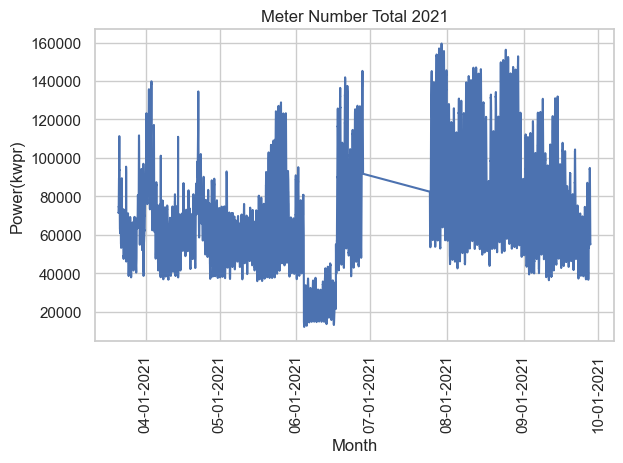

In [195]:
makeAnnualCharts(data)

In [ ]:
def makeSummaryCharts(x):
    xCopy = x.copy()
    xCopy["day"] = xCopy["date"].dt.date
    
    xAverage = xCopy.drop(["date","'AMI Meter ID'"],axis=1).groupby("day").mean()
    
    plt.clf()
    sns.pairplot(xAverage)
    plt.title("Meter PairPlot")
    make_dir(".\Summary Usage\\Pair Plot")
    plt.savefig(".\Summary Usage\\Pair Plot\\March-SeptemberPairPlot.png")
        
    plt.clf()
    sns.violinplot(xCopy)
    make_dir(".\Summary Usage\\Violin Plot")
    plt.savefig(".\Summary Usage\\Violin Plot\\March-SeptemberViolinPlot.png")
    
    plt.clf()
    num_cols = xCopy.select_dtypes(include=np.number).columns
    plot = []
    for i , col in enumerate(num_cols):
        plot = sns.lineplot(xCopy,x="date",y=col,legend = "brief", label = "Meter " + str(col) )
        
    plt.title("Meter Comparison")
    
    plot.xaxis.set_major_locator(MonthLocator(interval=1))
    plot.xaxis.set_major_formatter(DateFormatter('%m-%d-%Y'))

    plt.xlabel("Month")
    plt.ylabel("Power(kw)")
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    sns.set_theme(style="whitegrid")

    make_dir(".\Summary Usage\\Multiline Plot")
    plt.savefig(".\Summary Usage\\Multiline Plot\\March-SeptemberMultilinePlot.png")
    return

In [8]:
xCopy = data.copy()
xCopy["day"] = xCopy["date"].dt.date
    
xAverage = xCopy.drop(["date","AMI Meter ID"],axis=1).groupby("day").mean()
plt.clf()
sns.pairplot(xAverage)
plt.title("Meter PairPlot")
make_dir(".\Summary Usage\\Pair Plot")
plt.savefig(".\Summary Usage\\Pair Plot\\March-SeptemberPairPlot.png")


KeyboardInterrupt: 

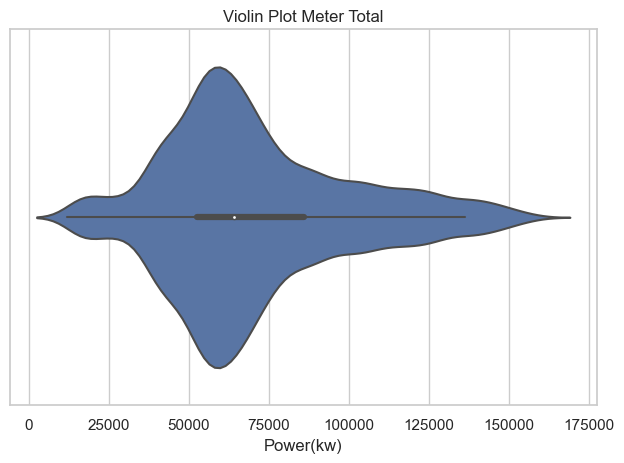

In [8]:
xCopy = data.copy()

for c in xCopy.select_dtypes(include=np.number).columns:
    plt.clf()
    sns.violinplot(xCopy, x = c)
    plt.title("Violin Plot Meter "+ str(c))
    plt.xlabel("Power(kw)")
    plt.tight_layout()
    sns.set_theme(style="whitegrid")
    make_dir(".\Summary Usage\\Violin Plot")
    plt.savefig(".\Summary Usage\\Violin Plot\\March-SeptemberMeter"+str(c)+"ViolinPlot.png")
    
    

C:\Users\Sdsmi\AppData\Local\Temp\ipykernel_4156\3202349285.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


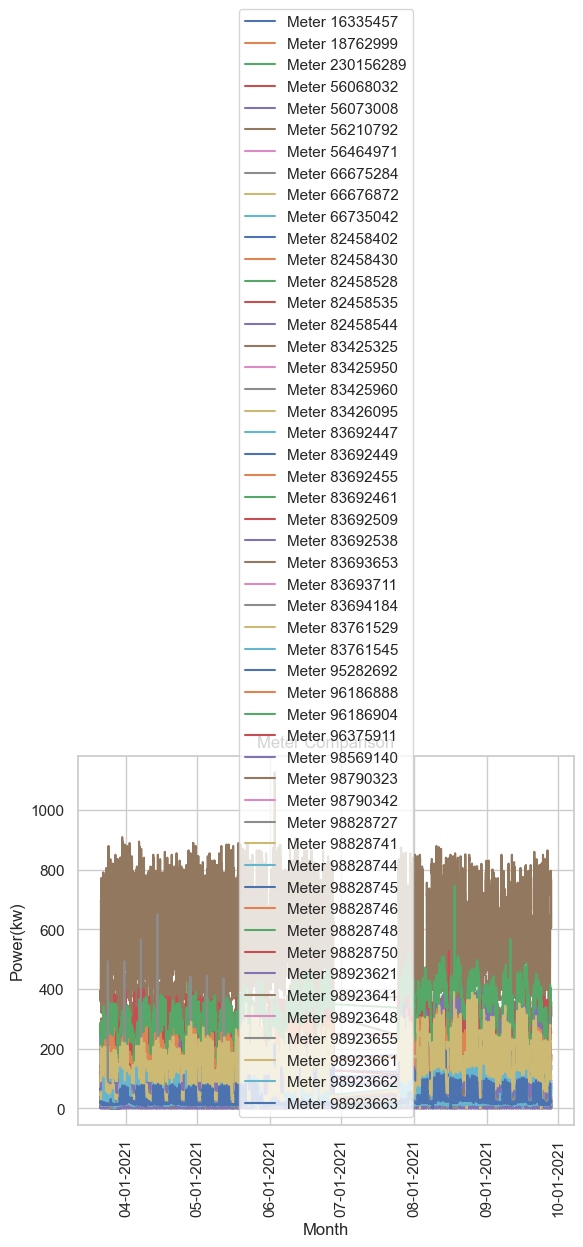

In [10]:
xCopy = data.copy()
plt.clf()
plot = []
num_cols = xCopy.drop(["Residential","Total"],axis=1).select_dtypes(include=np.number).columns
for i , col in enumerate(num_cols):
    plot = sns.lineplot(xCopy,x="date",y=col,legend = "brief", label = "Meter " + str(col) )
        
plt.title("Meter Comparison")
    
plot.xaxis.set_major_locator(MonthLocator(interval=1))
plot.xaxis.set_major_formatter(DateFormatter('%m-%d-%Y'))

plt.xlabel("Month")
plt.ylabel("Power(kw)")
plt.xticks(rotation='vertical')
plt.tight_layout()
sns.set_theme(style="whitegrid")

make_dir(".\Summary Usage\\Multiline Plot")
plt.savefig(".\Summary Usage\\Multiline Plot\\March-SeptemberMeter"+str(c)+"MultilinePlot.png")

In [11]:
makeSummaryCharts(data)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001D33133AB60> (for post_execute):


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

Error in callback <function flush_figures at 0x000001D344102160> (for post_execute):


KeyboardInterrupt: 